# Plot Antarctic ice sheets and shelves in cartopy

In [1]:
from matplotlib import pylab as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import xarray as xr
import pyresample as pr
import cmocean

In [2]:
ice_shelves = cfeature.NaturalEarthFeature(
        category='physical',
        name='antarctic_ice_shelves_polys',
        scale='10m',
        facecolor='lightcoral',
        edgecolor='lightcoral')

## Filled land

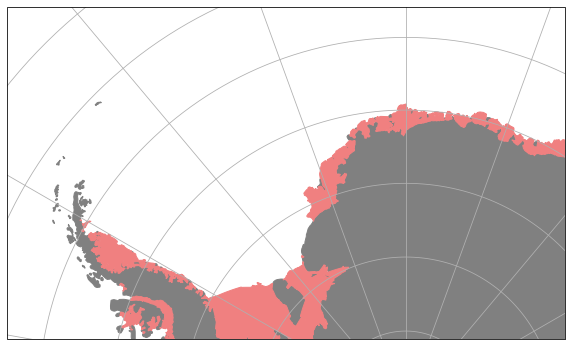

In [3]:
ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=-90.0,))

xlims = (-3000000,+1200000)
ylims = (+500000,+3000000)
plt.gcf().set_size_inches((10,10))
ax.add_feature(cartopy.feature.LAND, color='grey')


ax.add_feature(ice_shelves, )

ax.set_global()
ax.gridlines()

ax.set_xlim(*xlims)
ax.set_ylim(*ylims)



plt.show()

By choosing the same color (e.g gray) for the ice shelves and land, you can make them blend completely.

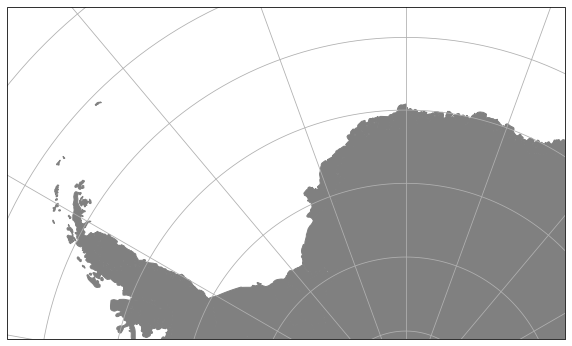

In [4]:
ice_shelves = cfeature.NaturalEarthFeature(
        category='physical',
        name='antarctic_ice_shelves_polys',
        scale='10m',
        facecolor='grey',
        edgecolor='grey')

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=-90.0,))

xlims = (-3000000,+1200000)
ylims = (+500000,+3000000)
plt.gcf().set_size_inches((10,10))
ax.add_feature(cartopy.feature.LAND, color='grey')


ax.add_feature(ice_shelves, )

ax.set_global()
ax.gridlines()

ax.set_xlim(*xlims)
ax.set_ylim(*ylims)

plt.show()

## Coastlines and outline of ice shelves

In [5]:
fn = 'https://thredds.met.no/thredds/dodsC/osisaf/met.no/reprocessed/ice/conc_amsr_458_files/2014/09/ice_conc_sh_ease2-250_cdr-v3p0-amsr_201409151200.nc'

ds = xr.open_dataset(fn)
adef, _= pr.utils.load_cf_area(ds)
ice_conc = ds['ice_conc'][0].to_masked_array()
print(type(ice_conc))

<class 'numpy.ma.core.MaskedArray'>


/home/thomasl/miniconda3/envs/py39/lib/python3.9/site-packages/pyproj/crs/crs.py:1282: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/thomasl/miniconda3/envs/py39/lib/python3.9/site-packages/pyproj/crs/crs.py:1282: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


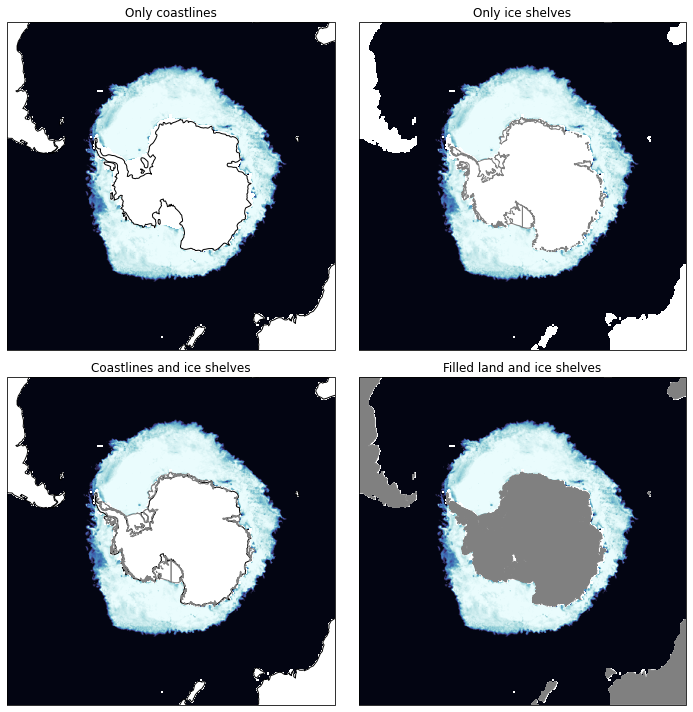

In [6]:
crs = adef.to_cartopy_crs()
fig, axs = plt.subplots(nrows=2,ncols=2, subplot_kw={'projection': crs}, figsize=(10,10))
ax1,ax2,ax3,ax4 = axs.flatten()

for ax in (ax1,ax2,ax3,ax4):
    ax.imshow(ice_conc, cmap=cmocean.cm.ice, vmin=0, vmax=100, transform=crs, extent=crs.bounds, origin='upper')

# only coastlines
ax1.coastlines()
ax1.set_title('Only coastlines')

# only ice_shelves
ice_shelves = cfeature.NaturalEarthFeature(
        category='physical',
        name='antarctic_ice_shelves_polys',
        scale='10m',
        facecolor='None',
        edgecolor='grey')
ax2.add_feature(ice_shelves, )
ax2.set_title('Only ice shelves')

# both coastlines and ice shelves
ax3.coastlines()
ax3.add_feature(ice_shelves, )
ax3.set_title('Coastlines and ice shelves')

# filled land and ice shelves
ice_shelves = cfeature.NaturalEarthFeature(
        category='physical',
        name='antarctic_ice_shelves_polys',
        scale='10m',
        facecolor='grey',
        edgecolor='grey')

ax4.add_feature(ice_shelves, )
ax4.add_feature(cartopy.feature.LAND, color='grey', edgecolor='grey')
ax4.set_title('Filled land and ice shelves')

plt.tight_layout()
plt.show()